# Lesson 0010 - MNIST linear classifier
We assume the reader to be familiar with the previous lessons.<br>
In this lesson, we will build a linear classifier for the [MNIST dataset](https://keras.io/datasets/#mnist-database-of-handwritten-digits) using tensorflow.<br>
For this end, we will load the data, perform some explorative analysis, print some data, transform the data and finally train a linear classifier.<br>
We will start by importing tensorflow, setting the random seed for reproducability and printing the version number.

In [1]:
import tensorflow as tf

tf.set_random_seed( 1234567890 )

print( tf.__version__ )

C:\Users\Robert\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


Next, we load the data and store them into __train_x__, __train_y__, __test_x__ and __test_y__:

In [2]:
( train_x, train_y ),( test_x, test_y ) = tf.keras.datasets.mnist.load_data()

Let's have a first look at the first item in __train_x__:

In [3]:
print( train_x[ 0 ] )

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Looks like all the values are integers.<br>
Let's check the dimensions of that first data item:

In [4]:
print( len( train_x[ 0 ] ) )

28


In [5]:
print( len( train_x[ 0 ][ 0 ] ) )

28


In [6]:
print( len( train_x ) )

60000


In [7]:
print( len( test_x ) )

10000


In [8]:
print( train_y[ 0 ] )

5


Ok, it looks like we have $60000$ $28 * 28$ pixel images in __train_x__, and for each image a 1-dimensional classification in __train_y__.<br>
Let's import NumPy to use its function unique to find out, how many classes there are.<br>
We begin by importing NumPy, setting the random seed and printing its version number.

In [9]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.14.3


In [10]:
print( np.unique( train_y ) )

[0 1 2 3 4 5 6 7 8 9]


Now, we import the Matplotlib and print its version number.

In [11]:
import matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

2.2.2


Now, we draw $100$ random numbers between $0$ and $60000$ and plot the corresponding data items from __train_x__.<br>
We manipulate the [figsize](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html) to get a bigger plot, and we manipulate the [colormap](https://matplotlib.org/api/cm_api.html) which we set to [grey](https://matplotlib.org/users/colormaps.html).

([], <a list of 0 Text yticklabel objects>)

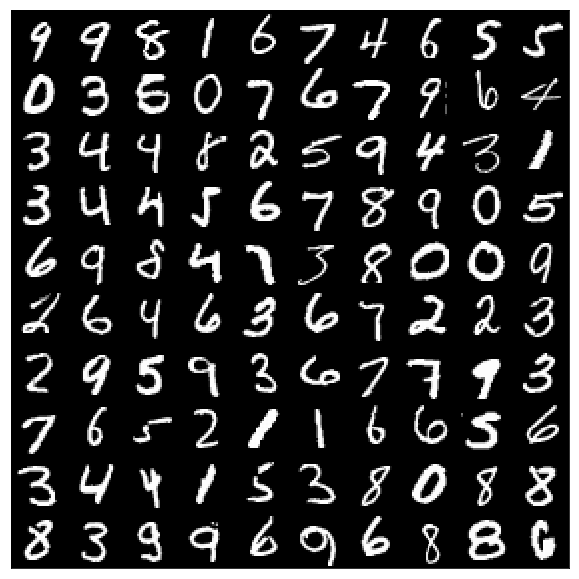

In [12]:
random_integers = np.random.choice( range( 60000 ), 100, replace = False )



mat = np.zeros( shape = [ 280, 280 ] )



for i in range( 10 ):
    
    for j in range( 10 ):
        
        x_d = i * 28
        
        x_u = 28 + i * 28
        
        y_l = j * 28
        
        y_r = 28 + j * 28
        
        mat[ x_d : x_u, y_l : y_r ] = train_x[ random_integers[ i * 10 + j ] ]
        

        
plt.figure( 1, figsize = ( 10, 10 ) )
        
plt.matshow( mat, cmap = plt.cm.gray, fignum = 1 )

plt.xticks( [ ] )

plt.yticks( [ ] )

Next, we standardize the data. We store the mean in __mu__ and the standard deviation in __sigma__.

In [13]:
mu = np.mean( train_x )

sigma = np.std( train_x )



train_x = ( train_x - mu ) / sigma

test_x = ( test_x - mu ) / sigma

We want to build a linear classifier like in lessons [0001](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0001_linear_classifier_tensorflow.ipynb) or [0006](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0006_breast_cancer_linear_classifier_fine_tuning.ipynb).<br>
But right now, our data are matrices. We use the NumPy function [flatten](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flatten.html) to transform the matrices into vectors.<br>
Also, we one hot encode the target data.

In [14]:
train_x_f = np.zeros( shape = [ 60000, 28 * 28 ] )

train_y_f = np.zeros( shape = [ 60000, 10 ] )

test_x_f = np.zeros( shape = [ 10000, 28 * 28 ] )

test_y_f = np.zeros( shape = [ 10000, 10 ] )




for i in range( 60000 ):
    
    train_y_f[ i, train_y[ i ] ] = 1.0
    
    
for i in range( 10000 ):
    
    test_y_f[ i, test_y[ i ] ] = 1.0
    

for i in range( 60000 ):
    
    dummy = np.array( train_x[ i ] )
    
    train_x_f[ i, : ] = dummy.flatten()
    
    
for i in range( 10000 ):
    
    dummy = np.array( test_x[ i ] )
    
    test_x_f[ i ] = dummy.flatten()
    
    
    
    
train_x = train_x_f

train_y = train_y_f

test_x = test_x_f

test_y = test_y_f

Now, we basically steal the code from [lesson 0006](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0006_breast_cancer_linear_classifier_fine_tuning.ipynb):

In [15]:
x_tf = tf.placeholder( tf.float32, shape = [ None, 28 * 28 ] )

y_tf = tf.placeholder( tf.float32, shape = [ None, 10 ] )

W_tf = tf.Variable( tf.zeros( [ 28 * 28, 10 ] ) )

b_tf = tf.Variable( tf.zeros( [ 10 ] ) )

classifier = tf.matmul( x_tf, W_tf ) + b_tf



cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( logits = classifier, labels = y_tf ) )



gd = tf.train.GradientDescentOptimizer( 1e-4 ).minimize( cross_entropy )



hit = tf.equal( tf.argmax( classifier, 1 ), tf.argmax( y_tf, 1 ) )



accuracy = 100 * tf.reduce_mean( tf.cast( hit, tf.float32 ) )

In [16]:
progress_train_s = []

progress_train = []

progress_test = []


sess = tf.Session()

sess.run( tf.global_variables_initializer() )

for i in range( 500 ):
    
    random_integers = np.random.choice( range( 60000 ), 30, replace = False )
    
    local_x = train_x[ random_integers, : ]
    
    local_y = train_y[ random_integers, : ]
    
    sess.run( gd, feed_dict = { x_tf : local_x, y_tf : local_y } )
    
    progress_train_s.append( sess.run( accuracy, feed_dict = { x_tf : local_x, y_tf : local_y } ) )
    
    progress_train.append( sess.run( accuracy, feed_dict = { x_tf : train_x, y_tf : train_y } ) )
    
    progress_test.append( sess.run( accuracy, feed_dict = { x_tf : test_x, y_tf : test_y } ) )
    
    
sess.close()

Text(0,0.5,'Accuracy (%)')

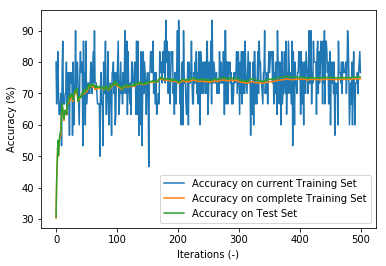

In [17]:
plt.plot( progress_train_s, label = 'Accuracy on current Training Set' )

plt.plot( progress_train, label = 'Accuracy on complete Training Set' )

plt.plot( progress_test, label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'Accuracy (%)' )

So, we reached an accuracy of a little over $70\%$.<br>
On the one hand, there is room for improvement, on the other hand: this result is astonishing!<br>
We considered $30$ training examples per iteration for $500$ iterations, so basically one fourth of the training set, and yet, we achieved an accuracy of $70\%$!<br>
As in [lesson 0006](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0006_breast_cancer_linear_classifier_fine_tuning.ipynb), we will perform a grid search.<br>
We will compare learning rates from $1e-8$ to $1$ and sample sizes from $10$ to $500$. We will perform for each configuration $100$ iterations and then evaluate the accuracy of the given configuration.<br>
For this investigation, we will split the training data into a training data set of $50000$ and a validation set of $10000$.

In [18]:
train_x_2 = np.zeros( shape = [ 50000, 28 * 28 ] )

train_y_2 = np.zeros( shape = [ 50000, 10 ] )

val_x_2 = np.zeros( shape = [ 10000, 28 * 28 ] )

val_y_2 = np.zeros( shape = [ 10000, 10 ] )



random_integers = np.random.choice( range( 60000 ), 50000, replace = False )

random_integers = np.sort( random_integers )



j = 0

k = 0



for i in range( 60000 ):
    
    if i == random_integers[ j ]:
        
        train_x_2[ j, : ] = train_x[ i, : ]
        
        train_y_2[ j, : ] = train_y[ i, : ]
        
        j = j + 1
        
        if j == 50000:
            
            j = 0
            
    else:
        
        val_x_2[ k, : ] = train_x[ i, : ]
        
        val_y_2[ k, : ] = train_y[ i, : ]
        
        k = k + 1

In [19]:
x_tf_2 = tf.placeholder( tf.float32, shape = [ None, 28 * 28 ] )

y_tf_2 = tf.placeholder( tf.float32, shape = [ None, 10 ] )

W_tf_2 = tf.Variable( tf.zeros( [ 28 * 28, 10 ] ) )

b_tf_2 = tf.Variable( tf.zeros( [ 10 ] ) )

learning_rate_tf_2 = tf.placeholder( tf.float32 )

classifier_2 = tf.matmul( x_tf_2, W_tf_2 ) + b_tf_2



cross_entropy_2 = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( logits = classifier_2, labels = y_tf_2 ) )



gd_2 = tf.train.GradientDescentOptimizer( learning_rate_tf_2 ).minimize( cross_entropy_2 )



hit_2 = tf.equal( tf.argmax( classifier_2, 1 ), tf.argmax( y_tf_2, 1 ) )



accuracy_2 = 100 * tf.reduce_mean( tf.cast( hit_2, tf.float32 ) )

In [20]:
grid_learning_rate = [ 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1 ]

grid_sample_size = [ 10, 20, 30, 50, 75, 100, 150, 200, 250, 300, 400, 500 ]

grid_matrix = np.zeros( shape = [ 9, 12 ] )



sess = tf.Session()



for i in range( 9 ):
    
    for j in range( 12 ):
        
        sess.run( tf.global_variables_initializer() )
        
        for k in range( 100 ):
                
            random_integers = np.random.choice( range( 50000 ), grid_sample_size[ j ], replace = False )
                
            local_x = train_x_2[ random_integers, : ]
    
            local_y = train_y_2[ random_integers, : ]
        
            sess.run( gd_2, feed_dict = { x_tf_2 : local_x, y_tf_2 : local_y, 
                                             learning_rate_tf_2 : grid_learning_rate[ i ] } )
            
        grid_matrix[ i, j ] = sess.run( accuracy_2, feed_dict = { x_tf_2 : val_x_2, y_tf_2 : val_y_2 } )
        
        
sess.close()

Here, we use the function [gca](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.gca.html) to get the current Axis object __ax__. We then use __ax__ with the function [set ticks position](https://matplotlib.org/api/_as_gen/matplotlib.axis.XAxis.set_ticks_position.html) to set the __xticks__ under the plot.

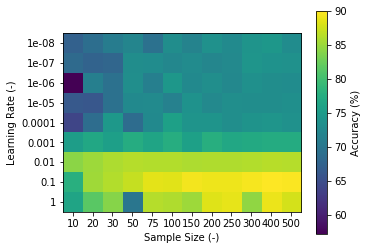

In [21]:
plt.matshow( grid_matrix )

ax = plt.gca()

ax.xaxis.set_ticks_position( 'bottom' )

plt.yticks( np.arange( len( grid_learning_rate ) ), grid_learning_rate )

plt.ylabel( 'Learning Rate (-)' )

plt.xticks( np.arange( len( grid_sample_size ) ), grid_sample_size )

plt.xlabel( 'Sample Size (-)' )

plt.colorbar( label = 'Accuracy (%)' )

Seems like the best compromise might be a learning rate of $0.1$ and a sample size of $250$. Let's try this configuration for $500$ iterations.

In [22]:
x_tf_3 = tf.placeholder( tf.float32, shape = [ None, 28 * 28 ] )

y_tf_3 = tf.placeholder( tf.float32, shape = [ None, 10 ] )

W_tf_3 = tf.Variable( tf.zeros( [ 28 * 28, 10 ] ) )

b_tf_3 = tf.Variable( tf.zeros( [ 10 ] ) )



classifier_3 = tf.matmul( x_tf_3, W_tf_3 ) + b_tf_3



cross_entropy_3 = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( logits = classifier_3, labels = y_tf_3 ) )



gd_3 = tf.train.GradientDescentOptimizer( 0.1 ).minimize( cross_entropy_3 )



hit_3 = tf.equal( tf.argmax( classifier_3, 1 ), tf.argmax( y_tf_3, 1 ) )



accuracy_3 = 100 * tf.reduce_mean( tf.cast( hit_3, tf.float32 ) )

In [23]:
progress_train_s_3 = []

progress_train_3 = []

progress_test_3 = []


sess = tf.Session()

sess.run( tf.global_variables_initializer() )

for i in range( 500 ):
    
    random_integers = np.random.choice( range( 60000 ), 250, replace = False )
    
    local_x = train_x[ random_integers, : ]
    
    local_y = train_y[ random_integers, : ]
    
    sess.run( gd_3, feed_dict = { x_tf_3 : local_x, y_tf_3 : local_y } )
    
    progress_train_s_3.append( sess.run( accuracy_3, feed_dict = { x_tf_3 : local_x, y_tf_3 : local_y } ) )
    
    progress_train_3.append( sess.run( accuracy_3, feed_dict = { x_tf_3 : train_x, y_tf_3 : train_y } ) )
    
    progress_test_3.append( sess.run( accuracy_3, feed_dict = { x_tf_3 : test_x, y_tf_3 : test_y } ) )
    
    
sess.close()

Text(0,0.5,'Accuracy (%)')

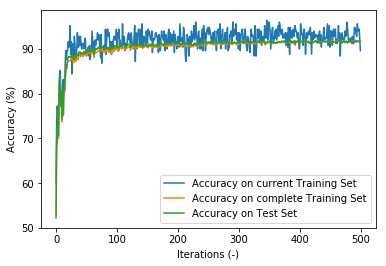

In [24]:
plt.plot( progress_train_s_3, label = 'Accuracy on current Training Set' )

plt.plot( progress_train_3, label = 'Accuracy on complete Training Set' )

plt.plot( progress_test_3, label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'Accuracy (%)' )

If we compare this plot with the plot from the first model, we notice that the variance of the accuracy on the current training set has diminished significantly and that the accuracy on all data sets improved.<br>
We also notice, that there is not really an improvement after iteration $300$, therefore, we will try the following: we will train another model for $300$ iterations with a learning rate of $0.1$, and then another $500$ iterations with a learning rate of $0.01$. We do this, because we assume, that we are near the optimum after $300$ iterations, and by diminishing the learning rate, we force the optimization algorithm to stay near this optimum.

In [25]:
x_tf_4 = tf.placeholder( tf.float32, shape = [ None, 28 * 28 ] )

y_tf_4 = tf.placeholder( tf.float32, shape = [ None, 10 ] )

learning_rate_tf_4 = tf.placeholder( tf.float32 )

W_tf_4 = tf.Variable( tf.zeros( [ 28 * 28, 10 ] ) )

b_tf_4 = tf.Variable( tf.zeros( [ 10 ] ) )



classifier_4 = tf.matmul( x_tf_4, W_tf_4 ) + b_tf_4



cross_entropy_4 = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( logits = classifier_4, labels = y_tf_4 ) )



gd_4 = tf.train.GradientDescentOptimizer( learning_rate_tf_4 ).minimize( cross_entropy_4 )



hit_4 = tf.equal( tf.argmax( classifier_4, 1 ), tf.argmax( y_tf_4, 1 ) )



accuracy_4 = 100 * tf.reduce_mean( tf.cast( hit_4, tf.float32 ) )

In [26]:
progress_train_s_4 = []

progress_train_4 = []

progress_test_4 = []


sess = tf.Session()

sess.run( tf.global_variables_initializer() )


learning_rate = 0.1



for i in range( 800 ):
    
    if i == 300:
        
        learning_rate = 0.01
    
    random_integers = np.random.choice( range( 60000 ), 250, replace = False )
    
    local_x = train_x[ random_integers, : ]
    
    local_y = train_y[ random_integers, : ]
    
    sess.run( gd_4, feed_dict = { x_tf_4 : local_x, y_tf_4 : local_y, learning_rate_tf_4 : learning_rate } )
    
    progress_train_s_4.append( sess.run( accuracy_4, feed_dict = { x_tf_4 : local_x, y_tf_4 : local_y } ) )
    
    progress_train_4.append( sess.run( accuracy_4, feed_dict = { x_tf_4 : train_x, y_tf_4 : train_y } ) )
    
    progress_test_4.append( sess.run( accuracy_4, feed_dict = { x_tf_4 : test_x, y_tf_4 : test_y } ) )
    
    
sess.close()

Text(0,0.5,'Accuracy (%)')

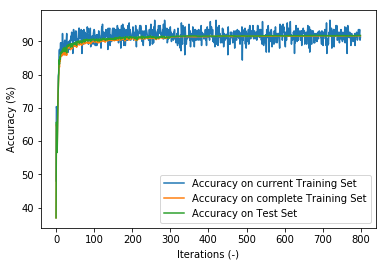

In [27]:
plt.plot( progress_train_s_4, label = 'Accuracy on current Training Set' )

plt.plot( progress_train_4, label = 'Accuracy on complete Training Set' )

plt.plot( progress_test_4, label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'Accuracy (%)' )

Ok, here we see, that after iteration $300$, where we applied the reduced learning rate, no improvement happens any more.<br>
Therefore, we cannot really improve this model by further tweaking the learning rate. Therefore<br>
Class dismissed.